In [92]:
# CODE PROVIDED
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

# Ignore warnings
filterwarnings("ignore")

In [93]:
# CODE PROVIDED
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [94]:
# CODE GIVEN
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [95]:
# CODE GIVEN
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [96]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df_market_data)

# Transform your data using the fitted scaler
df_market_data_normalized = scaler.transform(df_market_data)

# Display sample of normalized data
df_market_data_normalized[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

---

### Find the Best Value for k Using the Original Data.

In [97]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [98]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(df_market_data_normalized)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)


In [99]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values, 
    'inertia': inertia
    }

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k_values,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,54.739922
6,7,43.481606
7,8,37.517032
8,9,32.591891
9,10,28.222899


In [100]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x='k_values', 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k_values]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 is the best value for K. The argument could also be made for 4. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [101]:
# Initialize the K-Means model using the best value for k
best_kmeans = KMeans(n_clusters=3, random_state=42)

In [102]:
# Fit the K-Means model using the scaled data
best_kmeans.fit(df_market_data_normalized)

KMeans(n_clusters=3, random_state=42)

In [103]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = best_kmeans.predict(df_market_data_normalized)

# Print the resulting array of cluster values.
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [113]:
# Create a copy of the DataFrame and convert it to DataFrame
df_market_data_normalized_copy = pd.DataFrame(df_market_data_normalized.copy(), columns=df_market_data.columns, index=df_market_data.index)

In [114]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_normalized_copy['predicted_cluster'] = cluster_labels

# Display sample data
df_market_data_normalized_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [115]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_normalized_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",  # Color points with the predicted clusters
    cmap='viridis',  # Colormap for coloring points
    hover_cols=["coin_id"],  # Include cryptocurrency name in hover
    title="Scatter Plot of Price Change",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [116]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [117]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

principal_components = pca_model.fit_transform(df_market_data_normalized)

# Create a DataFrame from the principal components
df_principal_components = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2', 'PC3'],  # Name the columns as PC1, PC2, PC3
    index=df_market_data.index  # Keep the same index as the original DataFrame
)

# View the first five rows of the DataFrame. 
df_principal_components.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [118]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {ev:.2%}")

Explained Variance for PC1: 37.20%
Explained Variance for PC2: 34.70%
Explained Variance for PC3: 17.60%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance = 37.2 + 34.7 + 17.6 = 89.5

In [120]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(
    data=principal_components, # Use the principal components calculated earlier
    columns=['PC1', 'PC2', 'PC3'], # Name the columns
    index=df_market_data.index)# Use the index from the original DataFrame

# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [121]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans_model_pca = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the PCA-transformed data
    kmeans_model_pca.fit(df_pca_data)
    
    # Append the inertia to the list
    inertia_pca.append(kmeans_model_pca.inertia_)

In [122]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k_values_pca': k_values, 
    'inertia_pca': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca

,k_values_pca,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,30.777746
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.630648


In [123]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
line_chart = df_elbow_pca.hvplot.line(
    x='k_values_pca',
    y='inertia_pca',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    )

line_chart

:Curve   [k_values_pca]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best 'k' vaule when using the PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the original data had a best `k` value of 3

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [124]:
# Initialize the K-Means model using the best value for k
best_kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [126]:
# Fit the K-Means model using the PCA data
best_kmeans_pca.fit(df_pca_data)

KMeans(n_clusters=4, random_state=42)

In [127]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = best_kmeans_pca.predict(df_pca_data)
# Print the resulting array of cluster values.
cluster_labels_pca

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [128]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_data_copy['predicted_cluster'] = cluster_labels_pca

# Display sample data
df_pca_data_copy.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [129]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_pca_data_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",  # Color points with the predicted clusters
    cmap='viridis',  # Colormap for coloring points
    hover_cols=["coin_id"],  # Include cryptocurrency name in hover
    title="Scatter Plot of PCA Data (PC1 vs PC2)",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)"
)

scatter_plot


:Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

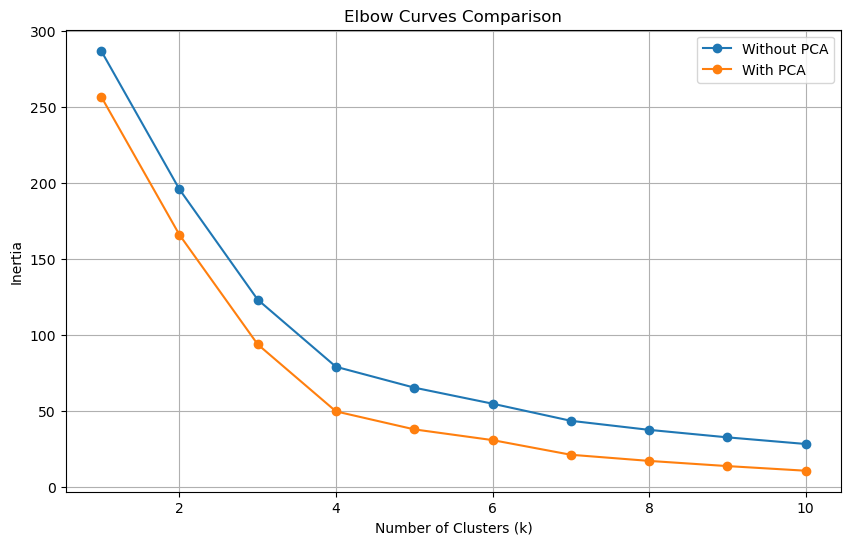

In [131]:
# Composite plot to contrast the Elbow curves

# Plot Elbow curves for both analyses on the same plot
plt.figure(figsize=(10, 6))

# Plot Elbow curve without PCA
plt.plot(df_elbow['k_values'], df_elbow['inertia'], marker='o', label='Without PCA')

# Plot Elbow curve with PCA
plt.plot(df_elbow_pca['k_values_pca'], df_elbow_pca['inertia_pca'], marker='o', label='With PCA')

# Add labels, title, legend, and grid
plt.title('Elbow Curves Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

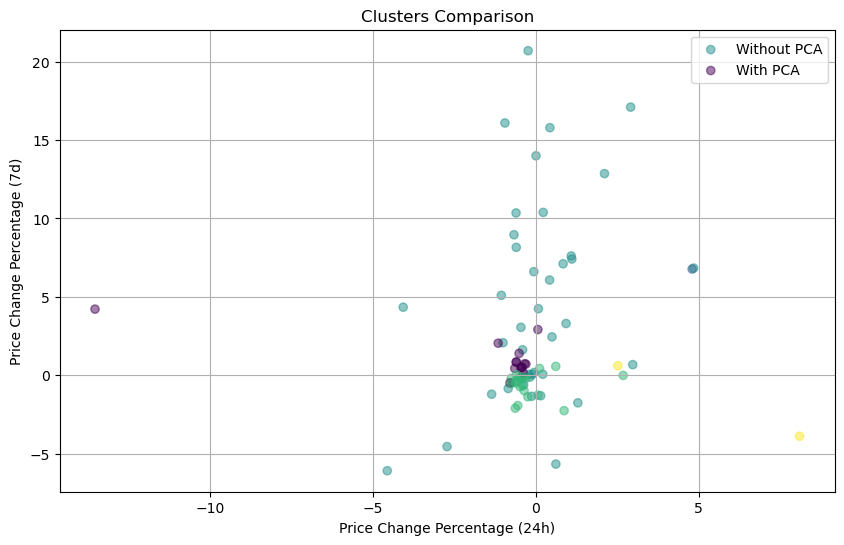

In [132]:
# Composite plot to contrast the clusters
# Plot the clusters for both analyses
# Plot clusters for both analyses on the same plot
plt.figure(figsize=(10, 6))

# Plot clusters without PCA
plt.scatter(df_market_data['price_change_percentage_24h'], df_market_data['price_change_percentage_7d'], c=cluster_labels, cmap='viridis', alpha=0.5, label='Without PCA')

# Plot clusters with PCA
plt.scatter(df_pca_data_copy['PC1'], df_pca_data_copy['PC2'], c=cluster_labels_pca, cmap='viridis', alpha=0.5, label='With PCA')

# Add labels, title, legend, and grid
plt.title('Clusters Comparison')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 